In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'retina', 'png'}

%load_ext autoreload
%autoreload 2

import glob

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('2021data.csv')
df.head()

,MEASURE,Unit,COUNTRY,Country,PRODUCT,Product,FLOW,Flow,TIME,Time,Value,Flag Codes,Flags
0,TJ,TJ,EU28,Memo: European Union-28,INDWASTE,Industrial waste,INDPROD,Production,2000,2000,100267.43,NaN,NaN
1,TJ,TJ,EU28,Memo: European Union-28,INDWASTE,Industrial waste,INDPROD,Production,2001,2001,130947.72,NaN,NaN
2,TJ,TJ,EU28,Memo: European Union-28,INDWASTE,Industrial waste,INDPROD,Production,2002,2002,126037.64,NaN,NaN
3,TJ,TJ,EU28,Memo: European Union-28,INDWASTE,Industrial waste,INDPROD,Production,2003,2003,72931.43,NaN,NaN
4,TJ,TJ,EU28,Memo: European Union-28,INDWASTE,Industrial waste,INDPROD,Production,2004,2004,72906.39,NaN,NaN


In [3]:
df_import = df.loc[(df['Flow'] == 'Imports')]
df_tes = df.loc[(df['Flow'] == 'Total energy supply')]

test=pd.DataFrame()
df_tes = df_tes.set_index(['Time'], ['Product'])
df_import = df_import.set_index(['Time'], ['Product'])
df_import['id'] = df_import['Value'] / df_tes['Value']
# df_import.to_csv('temp.csv')


In [4]:
df_import['Product'].unique()

array(['Industrial waste', 'Municipal waste (renewable)',
       'Municipal waste (non-renewable)', 'Primary solid biofuels',
       'Biogases', 'Biogasoline', 'Biodiesels', 'Bio jet kerosene',
       'Charcoal'], dtype=object)

In [6]:
df_import = df_import.query("Product == 'Biogasoline' | Product == 'Primary solid biofuels'| Product == 'Biodiesels'")
df_import['id'] *= 100
df_import.head()

,MEASURE,Unit,COUNTRY,Country,PRODUCT,Product,FLOW,Flow,TIME,Value,Flag Codes,Flags,id
Time,,,,,,,,,,,,,
2000,TJ,TJ,EU28,Memo: European Union-28,PRIMSBIO,Primary solid biofuels,IMPORTS,Imports,2000,32469.00,NaN,NaN,1.430483
2001,TJ,TJ,EU28,Memo: European Union-28,PRIMSBIO,Primary solid biofuels,IMPORTS,Imports,2001,38681.01,NaN,NaN,1.696466
2002,TJ,TJ,EU28,Memo: European Union-28,PRIMSBIO,Primary solid biofuels,IMPORTS,Imports,2002,50851.00,NaN,NaN,2.165219
2003,TJ,TJ,EU28,Memo: European Union-28,PRIMSBIO,Primary solid biofuels,IMPORTS,Imports,2003,70275.01,NaN,NaN,2.680207
2004,TJ,TJ,EU28,Memo: European Union-28,PRIMSBIO,Primary solid biofuels,IMPORTS,Imports,2004,100252.98,NaN,NaN,3.701647


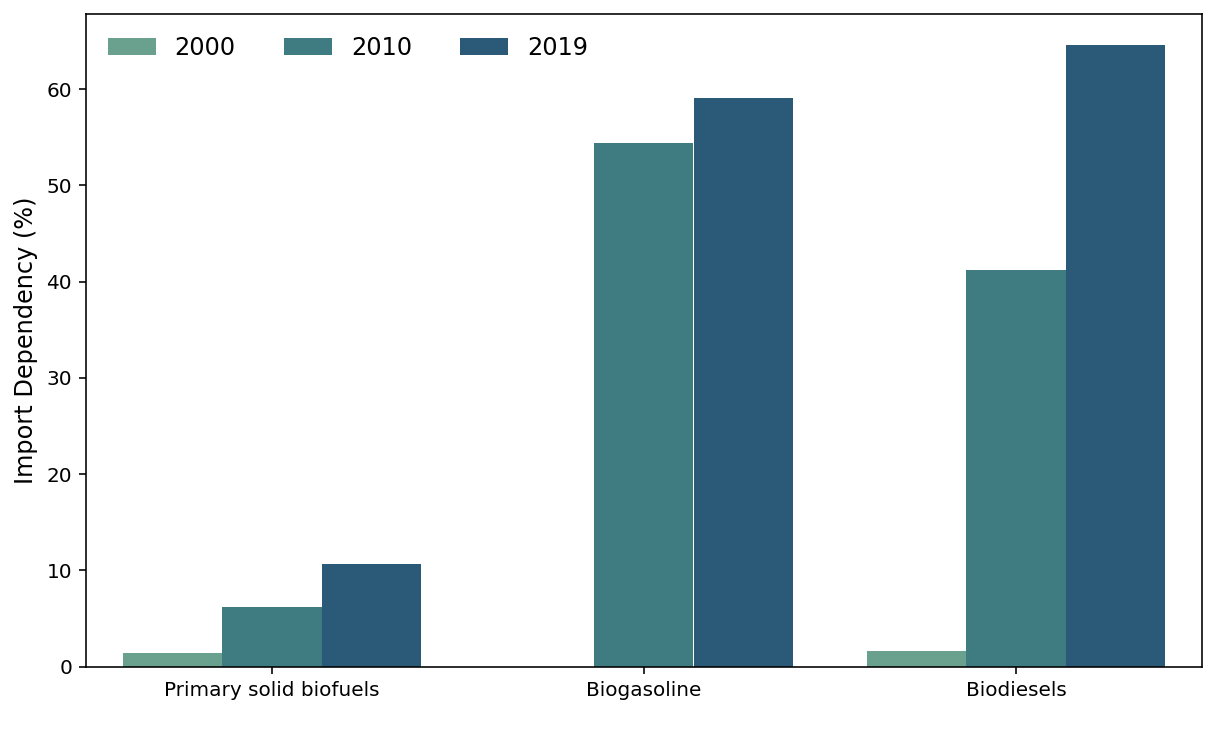

In [13]:

# sns.boxplot(
#     data=df_import, x='Product', y='id', hue='Import-dependent?'
# )
plt.figure(figsize=(10, 6))
sns.cubehelix_palette(start=.5, reverse = True, as_cmap=True)

ax = sns.barplot(
    data=df_import.query("TIME == 2000 | TIME == 2010 | TIME == 2019"),
     x="Product", y="id", hue="TIME", palette = 'crest')

ax.set_ylabel('Import Dependency (%)', fontsize='large')
ax.set_xlabel(' ', fontsize='medium')

ax.legend(frameon=False, ncol=3, fontsize='large')
# plt.axhline(y=1, color='grey', linestyle='-.')

plt.savefig(
    "figure_4_202111.pdf", dpi=600,
    bbox_inches='tight', pad_inches=0.2
)